Importación de librerias

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Importación de csvs

In [72]:
gasnatural = pd.read_csv('clean_data/gasnatural_clean.csv')
uranio = pd.read_csv('clean_data/uranio_clean.csv')
renovables = pd.read_csv('clean_data/renovables_clean.csv')
euaspot = pd.read_csv('clean_data/euaspot.csv')
demanda = pd.read_csv('clean_data/demanda.csv')

In [73]:
gasnatural = gasnatural.drop('Unnamed: 0', axis=1)
uranio = uranio.drop('Unnamed: 0', axis=1)
renovables = renovables.drop('Unnamed: 0', axis=1)
euaspot = euaspot.drop('Unnamed: 0', axis=1)
demanda = demanda.drop('Unnamed: 0', axis=1)


Limpiando eua SPOT

In [74]:
euaspot = euaspot[['value', 'date', 'weekend']]
# Convertir la columna "date" a tipo datetime
euaspot['date'] = pd.to_datetime(euaspot['date'])

# Filtrar a partir de 2020
euaspot = euaspot[euaspot['date'].dt.year >= 2020]

Mergeando

In [75]:
gasnatural.rename(columns={'Close': 'GasNatural'}, inplace=True)
uranio.rename(columns={'Close': 'Uranio'}, inplace=True)

In [76]:
demanda.rename(columns={'Fecha': 'Date'}, inplace=True)
renovables.rename(columns={'Fecha': 'Date'}, inplace=True)
euaspot.rename(columns={'date': 'Date'}, inplace=True)


In [77]:
# Convertir columnas "Date" a tipo "datetime" en cada dataframe
gasnatural['Date'] = pd.to_datetime(gasnatural['Date'])
uranio['Date'] = pd.to_datetime(uranio['Date'])
renovables['Date'] = pd.to_datetime(renovables['Date'])
euaspot['Date'] = pd.to_datetime(euaspot['Date'])
demanda['Date'] = pd.to_datetime(demanda['Date'])

In [78]:
# Combinar los dataframes utilizando la columna "date"
merged_df = pd.merge(demanda, gasnatural, on='Date', how='inner')
merged_df = pd.merge(merged_df, uranio, on='Date', how='inner')
merged_df = pd.merge(merged_df, renovables, on='Date', how='inner')
merged_df = pd.merge(merged_df, euaspot, on='Date', how='inner')


In [79]:
merged_df.head()

,Date,Demanda,GasNatural,Uranio,Hidráulica,Eólica,Otras renovables,Residuos renovables,Solar,value,weekend
0,2020-01-01,574.776720,0.827455,0.92,151.481978,23.525794,8.373805,2.454439,27.960236,39.995000,0
1,2020-01-02,723.522375,0.801905,0.93,159.171675,77.426389,8.407882,2.115271,22.901504,39.506250,0
2,2020-01-03,754.645342,0.841552,0.91,151.996921,84.099112,8.992384,2.115966,18.079815,35.670833,0
3,2020-01-04,702.390878,0.854703,0.91,139.873002,125.320489,9.549843,2.221634,24.877053,38.175417,1
4,2020-01-05,651.967486,0.838966,0.91,126.801179,61.809342,10.030028,2.247091,32.125610,42.166250,1


## Demanda vs Price

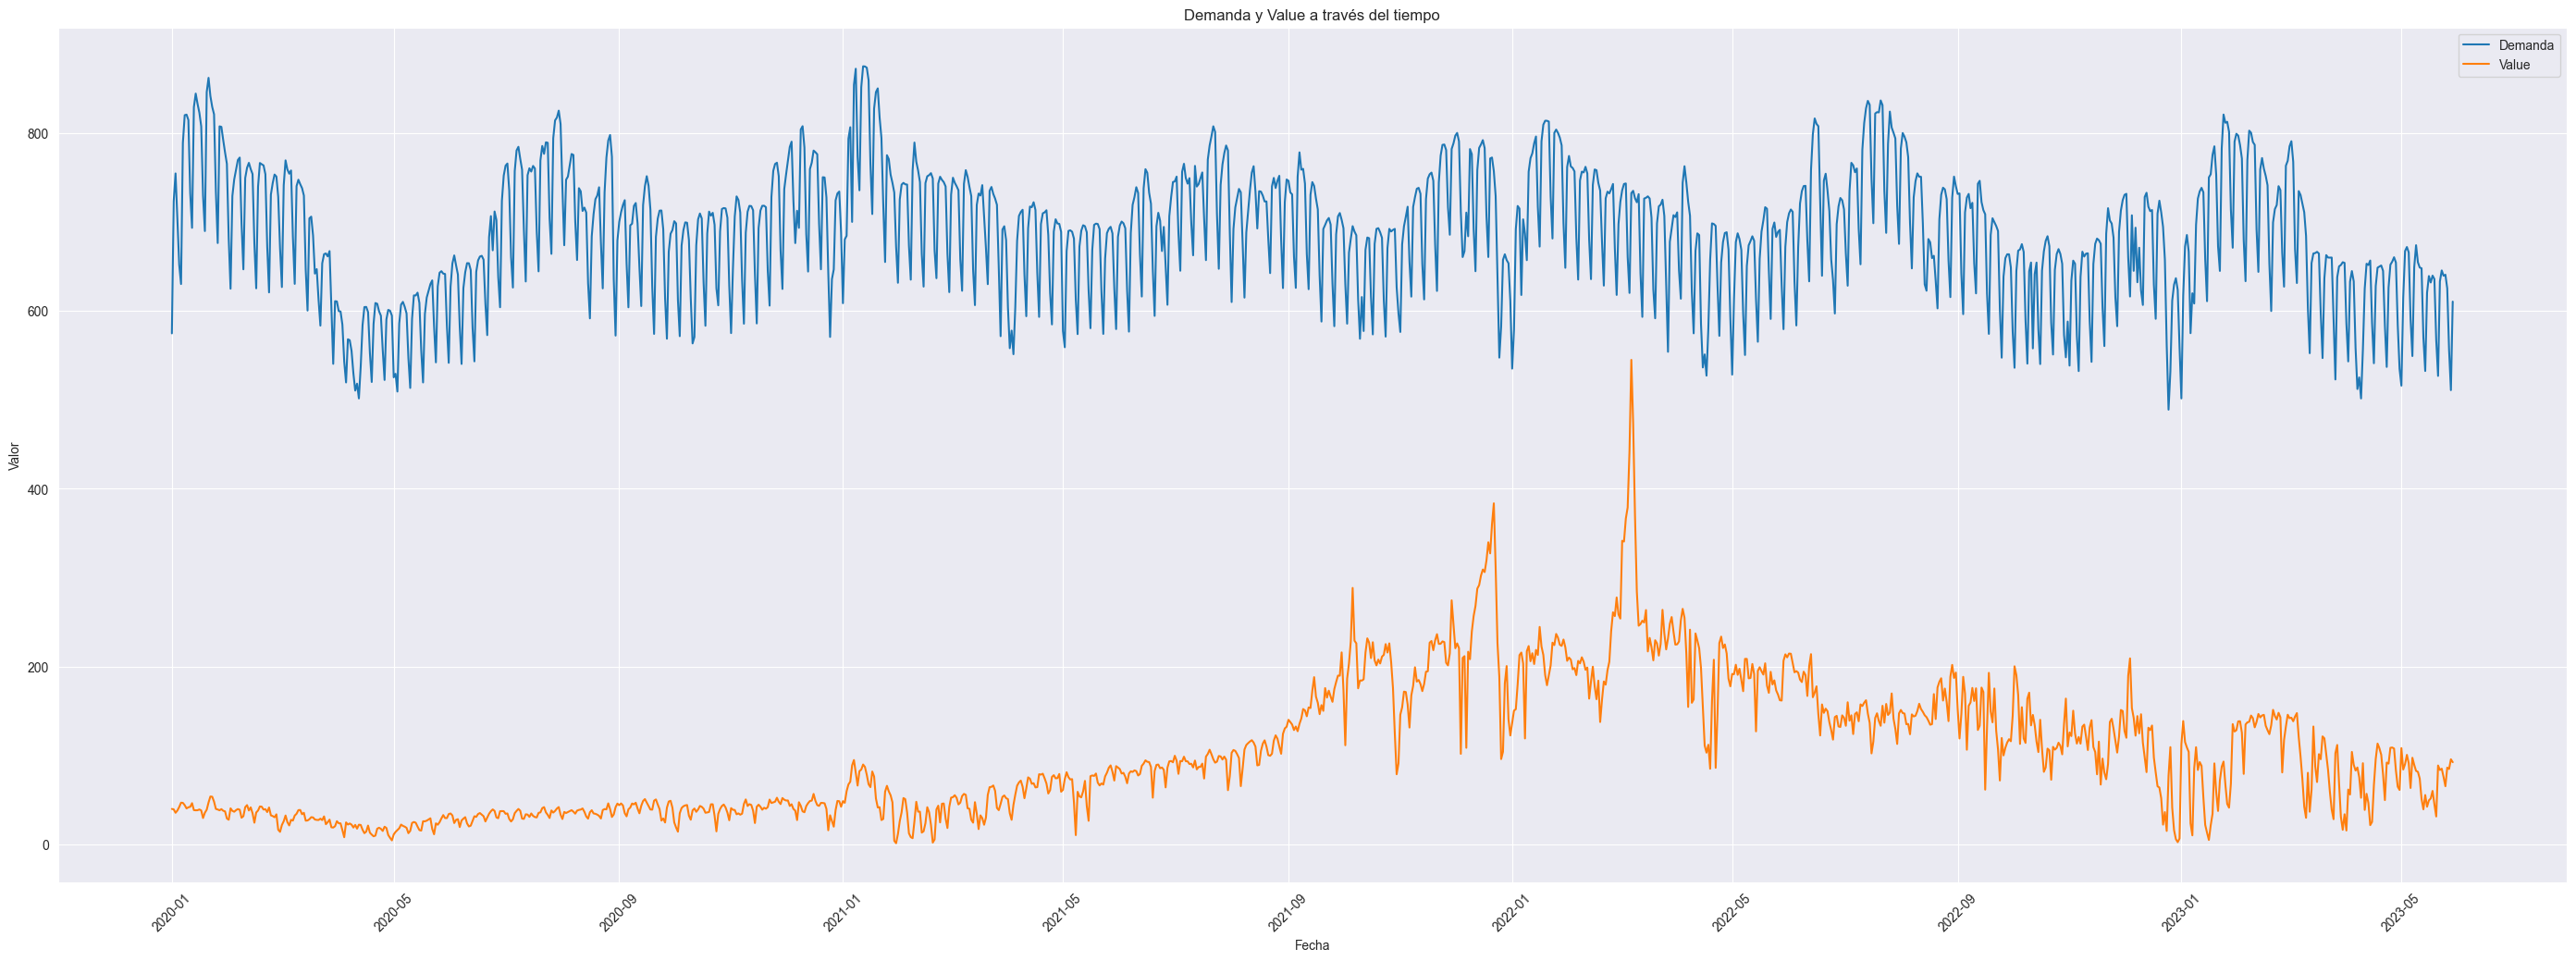

In [80]:
fig = plt.figure(figsize=(35,12))
sns.set_style("darkgrid")

# Graficar la columna "Demanda" utilizando Seaborn
sns.lineplot(data=merged_df, x='Date', y='Demanda', label='Demanda')

# Graficar la columna "value" utilizando Seaborn
sns.lineplot(data=merged_df, x='Date', y='value', label='Value')

# Configurar el título y las etiquetas de los ejes
plt.title('Demanda y Value a través del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

## Gas Natural vs Price

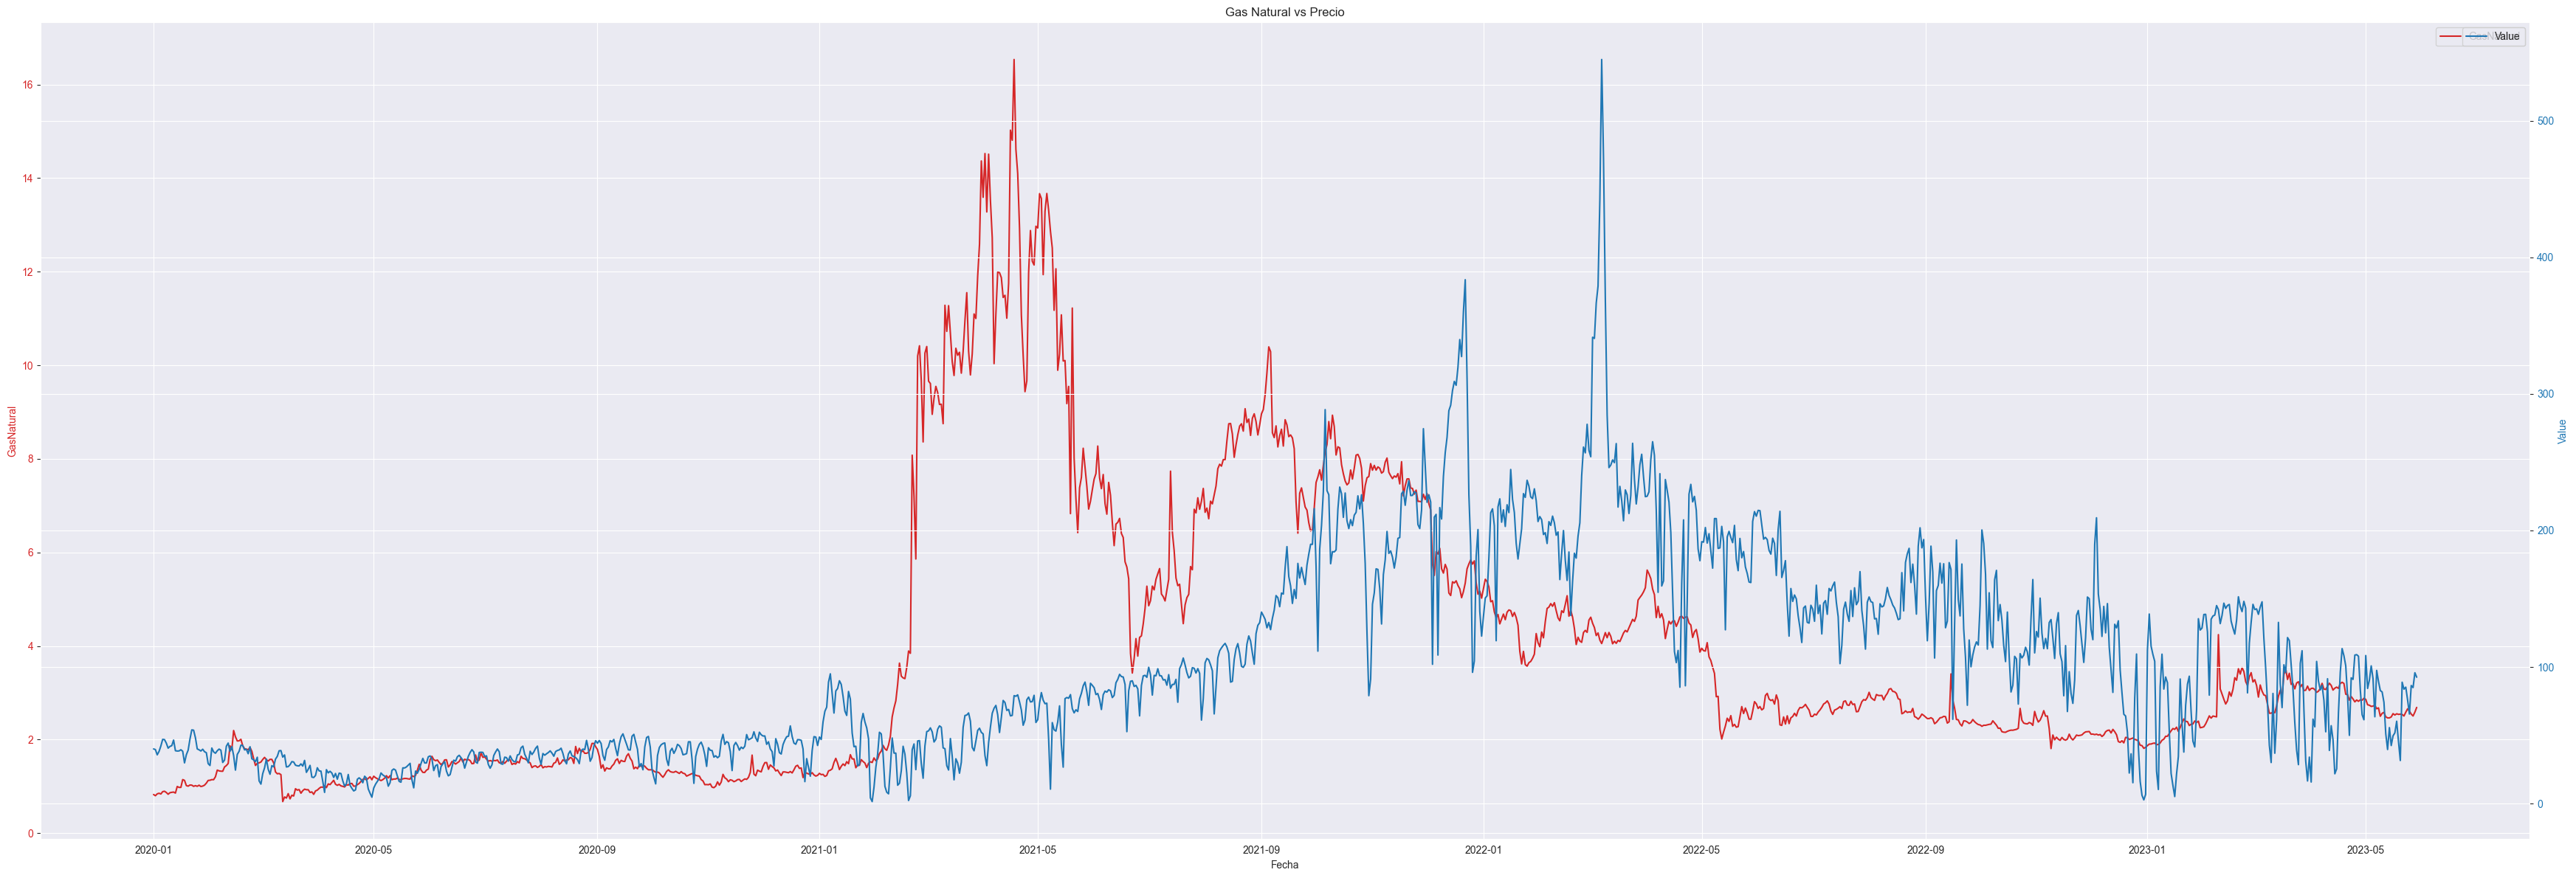

In [81]:
fig, ax1 = plt.subplots(figsize=(35, 12))
sns.set_style("darkgrid")

# Graficar la columna "GasNatural" en el primer eje
color1 = 'tab:red'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('GasNatural', color=color1)
ax1 = sns.lineplot(data=merged_df, x='Date', y='GasNatural', label='GasNatural', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Crear el segundo eje y asignarlo a la columna "value"
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Value', color=color2)
ax2 = sns.lineplot(data=merged_df, x='Date', y='value', label='Value', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Configurar el título
plt.title('Gas Natural vs Precio')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Ajustar el espaciado entre subplots para evitar superposiciones
fig.tight_layout()

# Mostrar el gráfico
plt.show()


## Uranio vs Precio

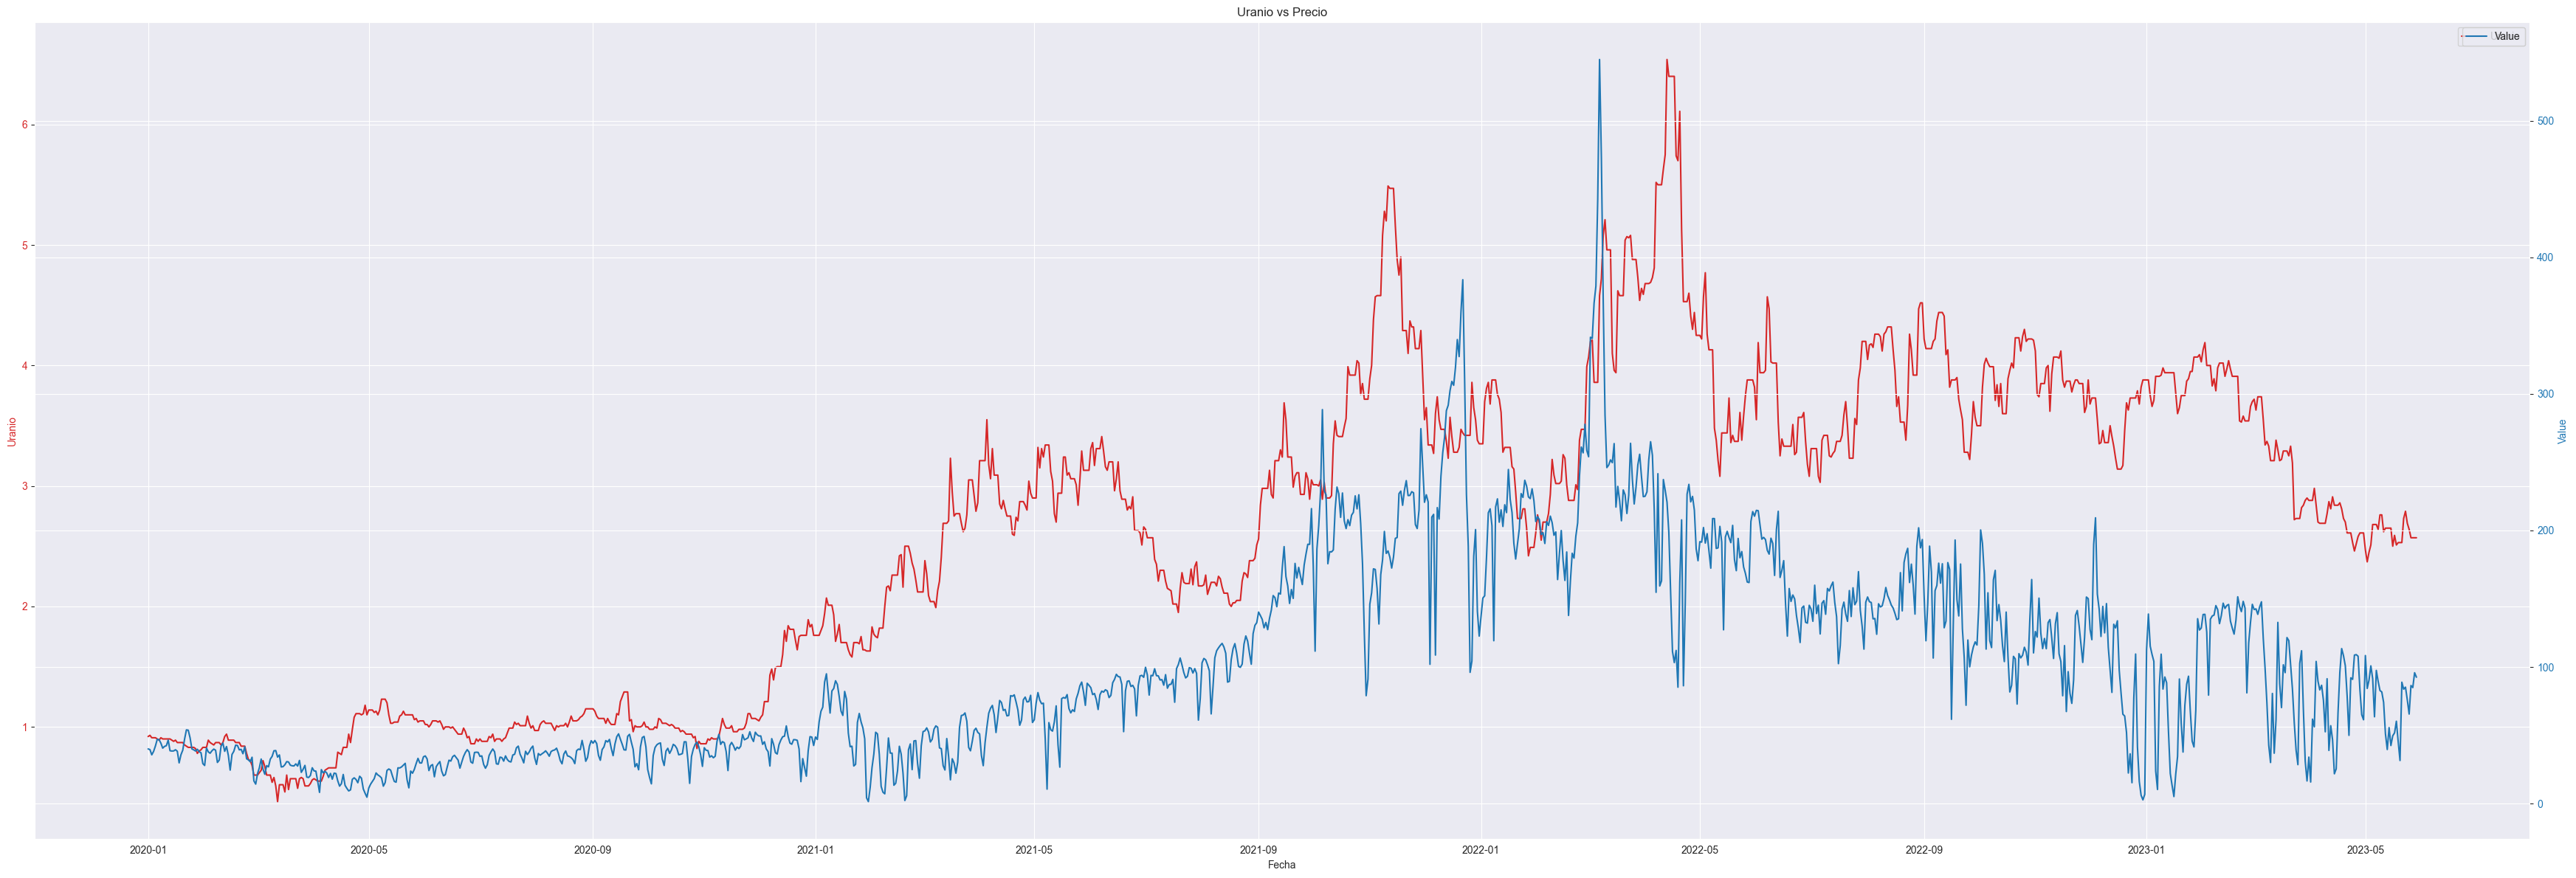

In [82]:
fig, ax1 = plt.subplots(figsize=(35, 12))
sns.set_style("darkgrid")

# Graficar la columna "GasNatural" en el primer eje
color1 = 'tab:red'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Uranio', color=color1)
ax1 = sns.lineplot(data=merged_df, x='Date', y='Uranio', label='Uranio', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Crear el segundo eje y asignarlo a la columna "value"
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Value', color=color2)
ax2 = sns.lineplot(data=merged_df, x='Date', y='value', label='Value', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Configurar el título
plt.title('Uranio vs Precio')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Ajustar el espaciado entre subplots para evitar superposiciones
fig.tight_layout()

# Mostrar el gráfico
plt.show()